# **1. Image rotation**
Rotate the given image by various angles. Hence write a code that will be generic for 90, 180 degrees.

Angle: 90


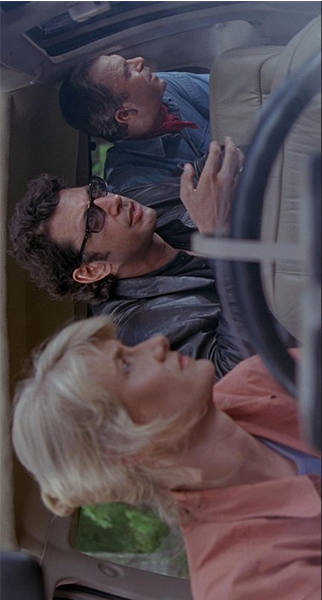

In [15]:
from PIL import Image
import numpy as np
import math

fileName = "rotate.png"
image = np.array(Image.open(fileName))             
angle=int(input("Angle: "))               


angle=math.radians(angle)                               
cosine=math.cos(angle)
sine=math.sin(angle)
height=image.shape[0]                                   
width=image.shape[1]                                   


# Define the height and width of the rotated bound
rotatedHeight  = abs(round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine)))
rotatedWidth  = abs(round(abs(image.shape[1]*cosine)-abs(image.shape[0]*sine)))


result = np.zeros((rotatedHeight,rotatedWidth,image.shape[2]))

# Centroid of the original
originalCentroidY   = round(((image.shape[0])/2))    
originalCentroidX    = round(((image.shape[1])/2))   

# Centroid of the resultant image
rotatedCentroidY= round(((rotatedHeight)/2))        
rotatedCentroidX= round(((rotatedWidth)/2))         

for i in range(height):
    for j in range(width):
        #co-ordinates of the pixels with respect to the centroid of original image
        y=image.shape[0]-i-originalCentroidY                
        x=image.shape[1]-j-originalCentroidX                   

        #Transformation
        rotatedY=round(-x*sine+y*cosine)
        rotatedX=round(x*cosine+y*sine)

        #Change of origin to centroid
        rotatedY=rotatedCentroidY-rotatedY
        rotatedX=rotatedCentroidX-rotatedX

        #Condition to prevent absurd values
        if 0 <= rotatedX < rotatedWidth and 0 <= rotatedY < rotatedHeight and rotatedX>=0 and rotatedY>=0:
            result[rotatedY,rotatedX,:]=image[i,j,:]                        

rotatedImage=Image.fromarray((result).astype(np.uint8))
rotatedImage

# **2. Applying kernels**
<ol>
  <li> Blurring ( ) </li>
  <li> Sharpening </li>
</ol>

In [42]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("filter.png")
input_pixels = input_image.load()

# Box Blur kernel
box_kernel = [[1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25],
              [1 / 25, 1 / 25, 1 / 25, 1 / 25, 1 / 25]]

# Gaussian kernel
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]

# Motion kernel                   
motion_kernel = [[1/5,0,0,0,0],
                 [0,1/5,0,0,0],
                 [0,0,1/5,0,0],
                 [0,0,0,1/5,0],
                 [0,0,0,0,1/5]]

# Sharpening kernel
sharpening_kernel = [[  0  , -0.5 ,    0 ],
                     [-0.5 ,   3  , -0.5 ],
                     [  0  , -0.5 ,    0 ]]



# Select kernel here:
kernel = box_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGBA", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        colorLayerTemp = [0, 0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                colorLayerTemp[0] += pixel[0] * kernel[a][b]
                colorLayerTemp[1] += pixel[1] * kernel[a][b]
                colorLayerTemp[2] += pixel[2] * kernel[a][b]
                colorLayerTemp[3] += pixel[3] * kernel[a][b]

        draw.point((x, y),(int(colorLayerTemp[0]), int(colorLayerTemp[1]), int(colorLayerTemp[2]),int(colorLayerTemp[3])))
  

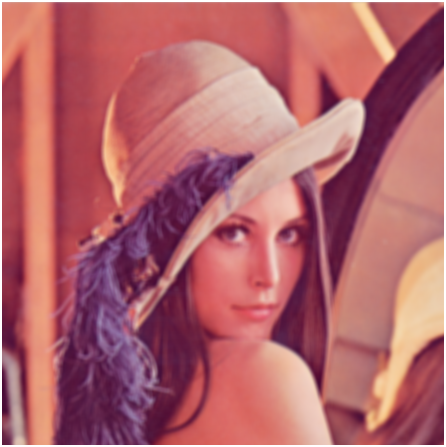

In [40]:
output_image #box blur

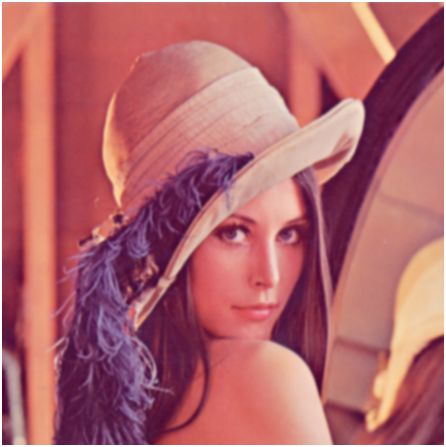

In [38]:
output_image #Gaussian_blur

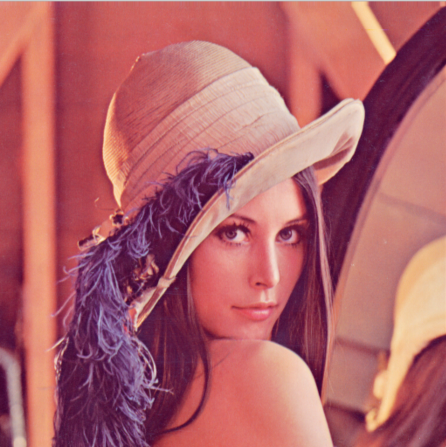

In [209]:
Image.open("filter.png")

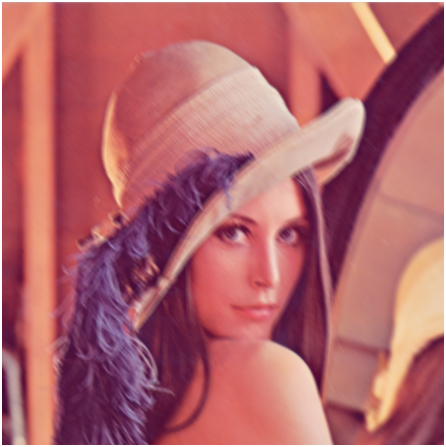

In [36]:
output_image #Motion blur

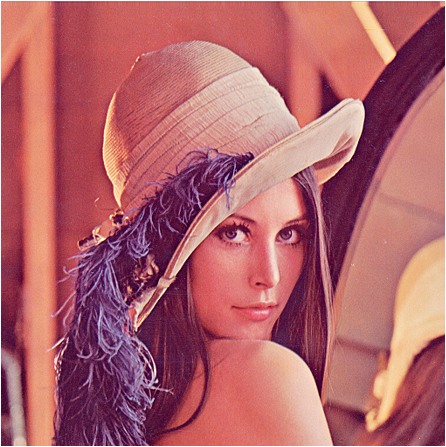

In [34]:
output_image #Sharpening

# **3.  Edge Detection**
Find out 3X3 filters which can do the following tasks and apply them on the given image

1. Vertical edge detection 
2. Horizontal edge detection 
3. Sobel edge detection (right, left, top, bottom) 
4. Canny edge detection

In [14]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("edge-detection2.jpg")
input_pixels = input_image.load()

# edge kernel
horizontal_edge_kernel =       [[  -1 ,   0  ,    1 ],
                              [  -1 ,   0  ,    1 ],
                              [  -1 ,   0  ,    1 ]]


vertical_edge_kernel =       [[ -1 , -1    , -1 ],
                                [  0 ,  0    ,  0 ],
                                [  1 ,  1    ,  1 ]]



# Select kernel here:
kernel = vertical_edge_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        colorLayerTemp = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                colorLayerTemp[0] += pixel[0] * kernel[a][b]
                colorLayerTemp[1] += pixel[1] * kernel[a][b]
                colorLayerTemp[2] += pixel[2] * kernel[a][b]

        draw.point((x, y),(int(colorLayerTemp[0]), int(colorLayerTemp[1]), int(colorLayerTemp[2])))



(61, 61, 57)


In [59]:
#Sobel up down left right amalgamation 
#If you want them separately (ie left,right...) then just using the above code with transposed kernels
from PIL import Image, ImageDraw
from math import sqrt

# Load image:
input_image = Image.open("edge-detection2.jpg")
input_pixels = input_image.load()

# Calculate pixel intensity as the average of red, green and blue colors.
intensity = [[sum(input_pixels[x, y]) / 3 for y in range(input_image.height)] for x in range(input_image.width)]

# Sobel kernels
kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                magx += intensity[xn][yn] * kernelx[a][b]
                magy += intensity[xn][yn] * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    

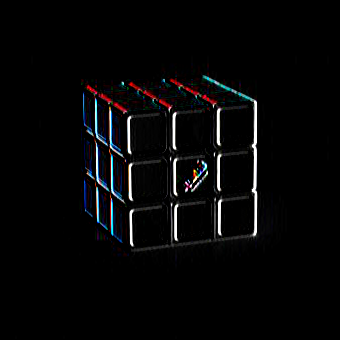

In [23]:
output_image #Vertical edge detection

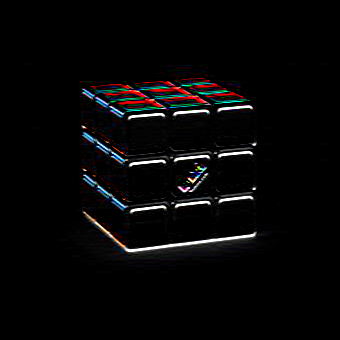

In [25]:
output_image #Horizontal edge detection

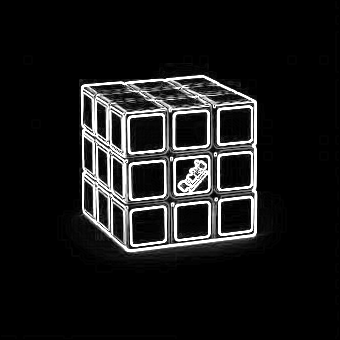

In [60]:
output_image #Sobel operator 

In [5]:
#Canny Edge Detection Implementation
from PIL import Image, ImageDraw
from math import sqrt


# Load image:
input_image = Image.open("edge-detection.png")
input_pixels = input_image.load()


# Sharpening kernel
smoothening_kernel = [[1/273, 4/273, 7/273, 4/273, 1/273],
                     [4/273, 16/273, 26/273, 16/273, 4/273],
                     [7/273, 26/273, 41/273, 26/273, 7/273],
                     [4/273, 16/273, 26/273, 16/273, 4/273],
                     [1/273, 4/273, 7/273, 4/273, 1/273]]


smootheningKernel2 = [[1/58,  1/58,  1/58,  1/58,  1/58], 
                      [1/58,  4/58,  4/58,  4/58,  1/58], 
                      [1/58,  4/58, 12/58,  4/58,  1/58], 
                      [1/58,  4/58,  4/58,  4/58,  1/58], 
                      [1/58,  1/58,  1/58,  1/58,  1/58]]
                     



# Select kernel here:
kernel = smootheningKernel2 #using this because it smoothens better so that the edge detection works better

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        colorLayerTemp = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                colorLayerTemp[0] += pixel[0] * kernel[a][b]
                colorLayerTemp[1] += pixel[1] * kernel[a][b]
                colorLayerTemp[2] += pixel[2] * kernel[a][b]

        draw.point((x, y),(int(colorLayerTemp[0]), int(colorLayerTemp[1]), int(colorLayerTemp[2])))

# Load smoothened image
input_image = output_image
input_pixels = input_image.load()

# Calculate pixel intensity as the average of red, green and blue colors.
intensity = [[sum(input_pixels[x, y]) / 3 for y in range(input_image.height)] for x in range(input_image.width)]

# Sobel kernels
kernelx = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernely = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx, magy = 0, 0
        for a in range(3):
            for b in range(3):
                xn = x + a - 1
                yn = y + b - 1
                magx += intensity[xn][yn] * kernelx[a][b]
                magy += intensity[xn][yn] * kernely[a][b]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    

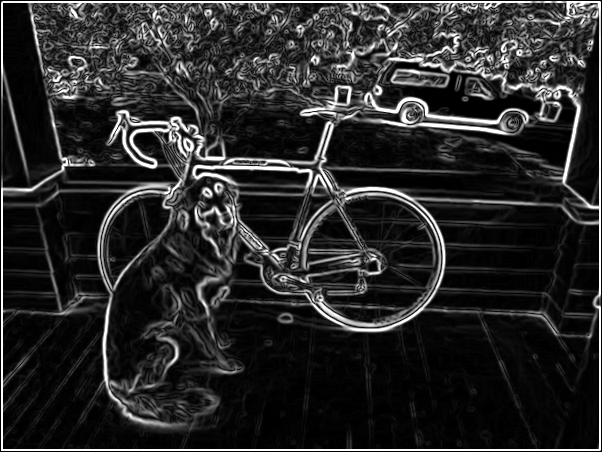

In [4]:
output_image #Using smoothening

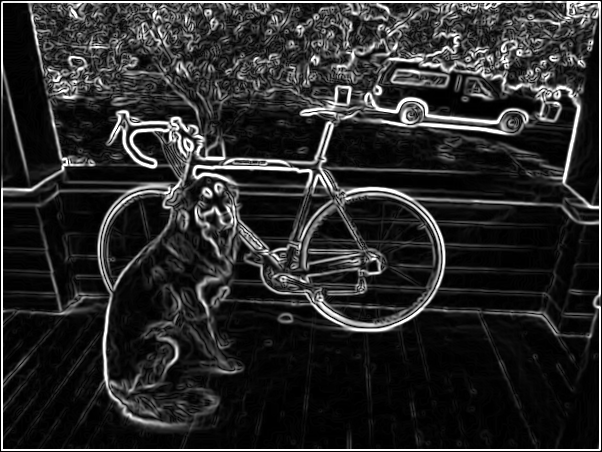

In [6]:
output_image

# **4. Morphological Transformation** (Incomplete)
1. Find out about morphological transforms (erosion , dilation) and apply them on given images
2. Also find out if you can use the dialated image for edge detection

In [56]:
from PIL import Image, ImageDraw

# Load image:
input_image = Image.open("morphological.png")
input_pixels = input_image.load()

# erosion kernel
erosion_kernel =     [[  255 ,   255 ,    255 ],
                      [  255 ,   255  ,   255 ],
                      [  255 ,   255  ,   255 ]]



# Select kernel here:
kernel = erosion_kernel

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution between intensity and kernels
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        for i in range(3):
          ctr=0
          colorLayerTemp = [0,0,0]
          for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                if((pixel[i]==kernel[a][b])):
                  ctr+=1
          if ctr==9 :   #Change it to "ctr>1" for dialation and "ctr==9" for erosion
            colorLayerTemp[0]=255
            colorLayerTemp[1]=255
            colorLayerTemp[2]=255
          else:
            colorLayerTemp[0]=0
            colorLayerTemp[1]=0
            colorLayerTemp[2]=0          

        draw.point((x, y),(int(colorLayerTemp[0]), int(colorLayerTemp[1]), int(colorLayerTemp[2])))

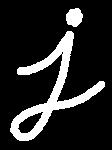

In [17]:
Image.open("morphological.png") #Original

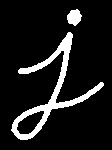

In [57]:
output_image #Eroded image

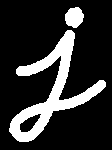

In [54]:
output_image #Dialated image

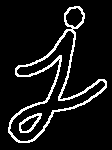

In [50]:
output_image #Using dialated image on an edge detection kernel

# **5. Masking**
For this section your task is to detect a blue ball


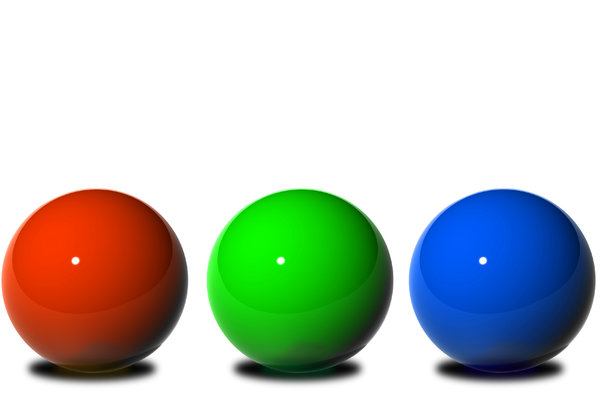

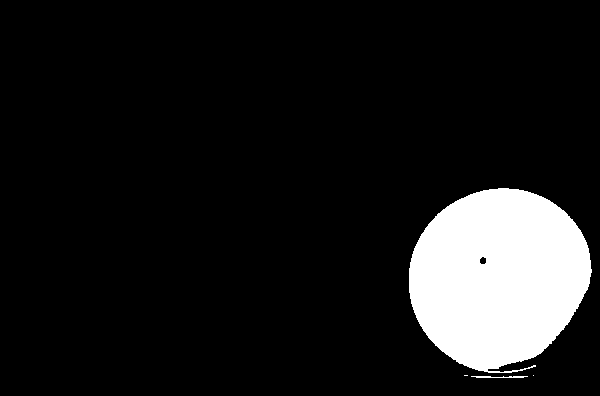

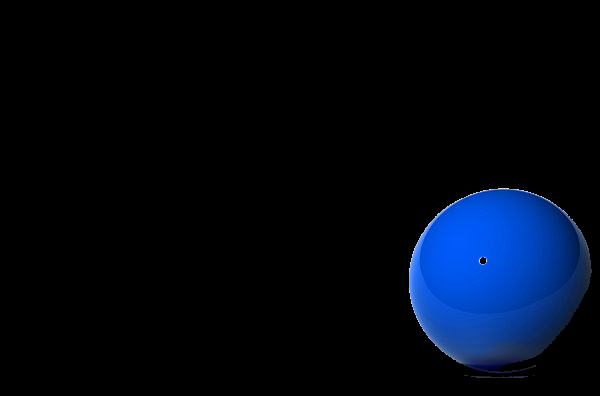

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image = cv.imread("mask.jpg")

# Convert BGR to HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)


#Setting the bounds
lowerBlue = np.array([95,50,50])
upperBlue = np.array([145,255,255])

#Thresholding to get only blue
mask = cv.inRange(hsv, lowerBlue, upperBlue)

#Bitwise AND mask and the image 
result = cv.bitwise_and(image, image, mask=mask)
cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(result)






# **6. ROI (Region Of Interest)**
ROI (Region of interest) is obtained by Numpy indexing. Use Figure 1 to obtain Figure 2



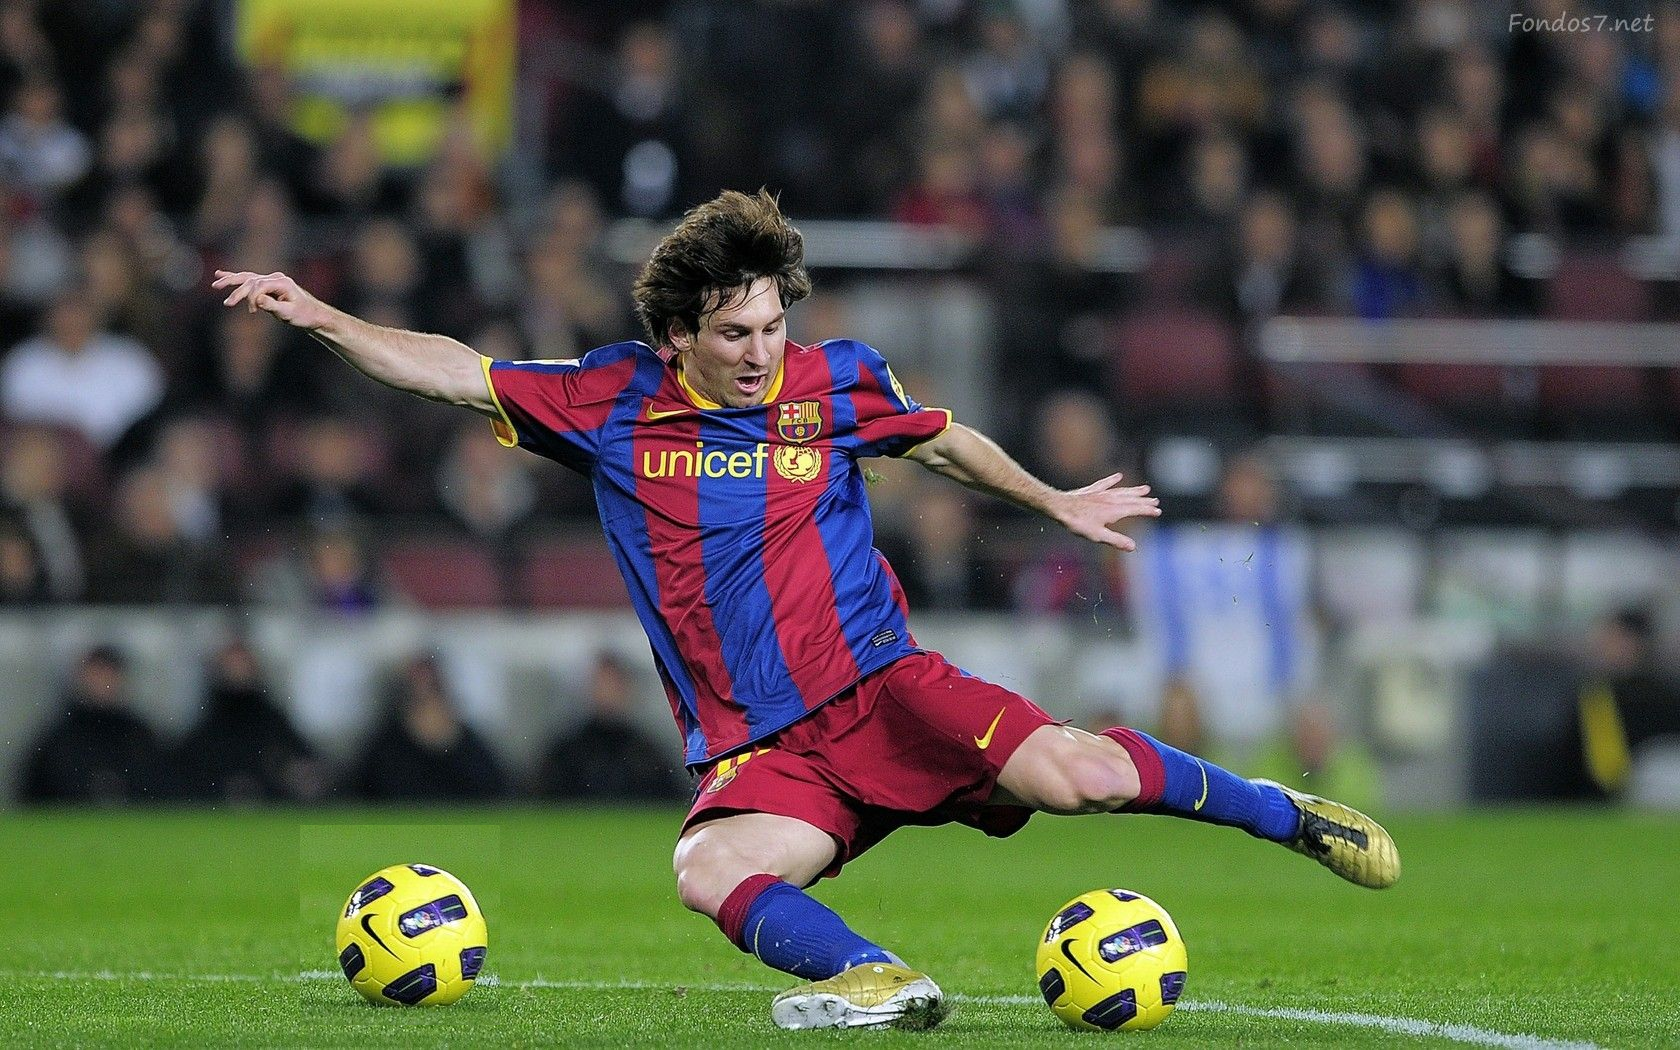

In [24]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


img = cv.imread("roi.jpg")
#img[850:1050,1000:1200] = [255,255,255]
ball = img[850:1050,1000:1200]
img[825:1025,300:500] = ball

cv2_imshow(img)